## Omar Ehab's Notebook

Index(['text', 'airline_sentiment'], dtype='object')
Training Accuracy: 0.8818
Testing Accuracy: 0.7658

Classification Report:
              precision    recall  f1-score   support

    negative       0.81      0.90      0.85      1811
     neutral       0.60      0.48      0.54       617
    positive       0.75      0.62      0.67       458

    accuracy                           0.77      2886
   macro avg       0.72      0.67      0.69      2886
weighted avg       0.76      0.77      0.76      2886

AUC Value: 0.8822


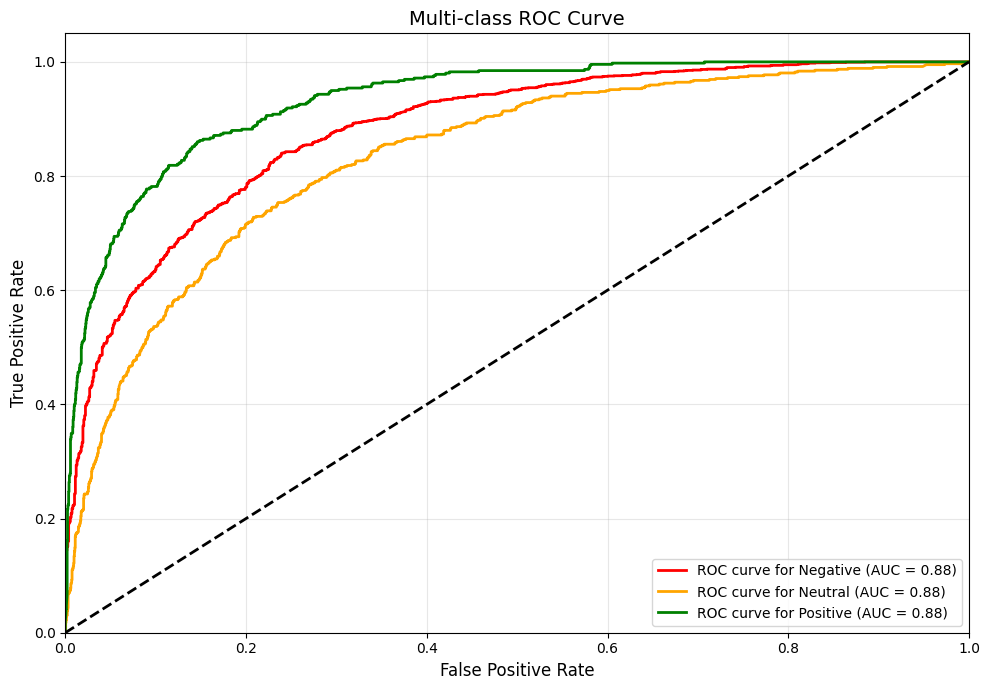

In [ ]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/ThisIsMrIsmail/twitter-us-airline-sentiment-analysis/3bce8fc85f3dfd94f89e50ec6017d87ef6ec09c2/data/clean_Tweets.csv"
df = pd.read_csv(url)

print(df.columns)

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['text'])

sentiment_map = {'negative': 0, 'neutral': 1, 'positive': 2}
y = df['airline_sentiment'].map(sentiment_map)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=['negative', 'neutral', 'positive']))

y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_score = svm.predict_proba(X_test)
auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr')
print(f"AUC Value: {auc:.4f}")

fpr = {}
tpr = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])

plt.figure(figsize=(10, 7))
colors = ['red', 'orange', 'green']
class_names = ['Negative', 'Neutral', 'Positive']

for i in range(3):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve for {class_names[i]} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Multi-class ROC Curve', fontsize=14)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()




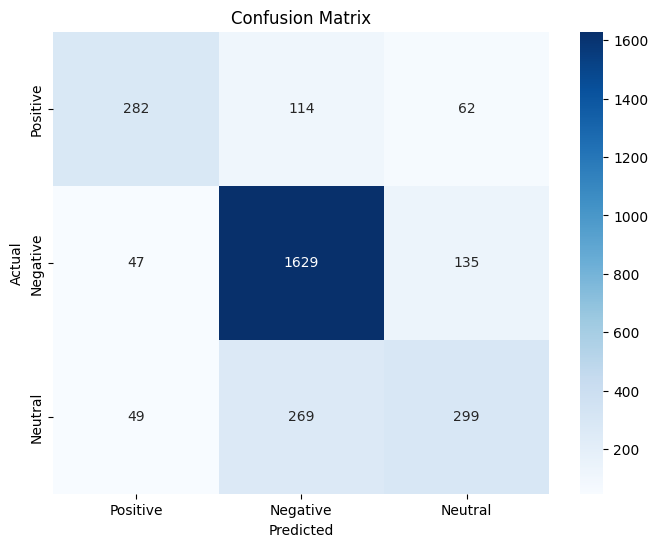

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred, labels=[2, 0, 1])  # positive=2, negative=0, neutral=1

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positive', 'Negative', 'Neutral'],
            yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
